# 1. Définition du Problème et Objectifs

## Contexte et Pertinence 

Dans un contexte mondial où la gestion efficace de l'énergie est devenue une priorité cruciale, notre projet vise à analyser la consommation d'énergie par département dans différents secteurs en France. L'objectif est de fournir une compréhension approfondie des modèles de consommation énergétique, qui est essentielle pour orienter les politiques énergétiques, promouvoir la durabilité et optimiser les ressources. Ce projet est particulièrement pertinent étant donné les défis actuels liés au changement climatique et à la transition énergétique. En examinant les données de consommation énergétique à l'échelle des départements, nous pouvons identifier des tendances spécifiques, des anomalies et des opportunités d'amélioration. Cela permettra aux décideurs, aux entreprises et aux consommateurs de prendre des mesures éclairées pour réduire la consommation d'énergie, améliorer l'efficacité énergétique et favoriser l'adoption d'énergies renouvelables. En outre, ce projet contribue à une meilleure compréhension des disparités régionales en matière de consommation d'énergie, offrant ainsi une perspective précieuse pour des interventions ciblées et personnalisées.  

## Objectifs du Projet

Notre projet, au cœur de l'intersection entre technologie, environnement et société, se fixe des objectifs ambitieux et significatifs :

**Cartographie de la Consommation Énergétique :** Notre premier objectif est de dresser une carte précise de la consommation d'énergie dans les différents départements français. En mettant en lumière ces données, nous souhaitons offrir une vision claire et détaillée de la répartition énergétique sur le territoire.

**Identification des Tendances et Anomalies :** Nous visons à décrypter les tendances sous-jacentes et à détecter d'éventuelles anomalies dans les habitudes de consommation énergétique. Cela permettra de comprendre les pratiques énergétiques actuelles et d'identifier les zones à haut potentiel d'amélioration.

**Analyse Comparative par Secteur :** Un autre objectif crucial est de comparer la consommation énergétique entre différents secteurs (résidentiel, industriel, commercial, etc.). Cela aidera à cerner les secteurs les plus énergivores et à envisager des stratégies d'optimisation.

**Prédiction des Tendances Futures :** Nous ambitionnons de développer des modèles prédictifs pour anticiper les évolutions futures de la consommation d'énergie. Ces prévisions seront essentielles pour planifier des stratégies énergétiques à long terme.

**Contribution à la Durabilité :** En offrant une compréhension approfondie de la consommation d'énergie, le projet aspire à contribuer activement à des initiatives de développement durable. Les insights générés pourraient inspirer des actions concrètes pour réduire l'empreinte énergétique.

**Support aux Décisions Politiques et Commerciales :** Fournir des données et des analyses fiables pour éclairer les décisions politiques et commerciales en matière de gestion de l'énergie. Cela inclut la recommandation de politiques efficaces et la sensibilisation aux meilleures pratiques en matière de consommation énergétique.

**Sensibilisation et Éducation :** Enfin, nous souhaitons utiliser nos résultats pour sensibiliser le public et les décideurs aux enjeux de la consommation d'énergie. L'objectif est de promouvoir une culture de consommation énergétique responsable et informée.

## Aspects techniques

### Packages

In [1]:
# Installation des packages

!pip install -q lxml
!pip install webdriver-manager
!pip install BeautifulSoup4
!pip install pandas fiona shapely pyproj rtree # à faire obligatoirement en premier pour utiliser rtree ou pygeos pour les jointures spatiales
!pip install contextily
!pip install geopandas
!pip install pygeos
!pip install topojson
!pip install seaborn

import requests
import re
import bs4
import lxml
import pandas as pd
import urllib
import seaborn

from urllib import request

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.3/40.3 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.4/125.4 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 8.9 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 10.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 2.1 MB/s eta 0:00:0000:01


### URL

In [2]:
url_1 = "https://odre.opendatasoft.com/explore/embed/dataset/conso-departement-annuelle/table/?disjunctive.libelle_departement&disjunctive.libelle_region&disjunctive.e_operateurs&disjunctive.g_operateurs&refine.annee=2021&dataChart=eyJxdWVyaWVzIjpbeyJjaGFydHMiOlt7InR5cGUiOiJjb2x1bW4iLCJmdW5jIjoiQVZHIiwieUF4aXMiOiJjb25zb3RvdGFsZSIsInNjaWVudGlmaWNEaXNwbGF5Ijp0cnVlLCJjb2xvciI6IiM2NmMyYTUifV0sInhBeGlzIjoibGliZWxsZV9kZXBhcnRlbWVudCIsIm1heHBvaW50cyI6NTAsInNvcnQiOiIiLCJjb25maWciOnsiZGF0YXNldCI6ImNvbnNvLWRlcGFydGVtZW50LWFubnVlbGxlIiwib3B0aW9ucyI6eyJkaXNqdW5jdGl2ZS5saWJlbGxlX2RlcGFydGVtZW50Ijp0cnVlLCJkaXNqdW5jdGl2ZS5saWJlbGxlX3JlZ2lvbiI6dHJ1ZSwiZGlzanVuY3RpdmUuZV9vcGVyYXRldXJzIjp0cnVlLCJkaXNqdW5jdGl2ZS5nX29wZXJhdGV1cnMiOnRydWUsInJlZmluZS5hbm5lZSI6IjIwMjEifX19XSwidGltZXNjYWxlIjoiIiwiZGlzcGxheUxlZ2VuZCI6dHJ1ZSwiYWxpZ25Nb250aCI6dHJ1ZX0%3D&location=3,17.56025,53.4375&basemap=jawg.light"
url_2 = "https://www.insee.fr/fr/statistiques/6436484?sommaire=6036904#tableau-figure1_radio1"
url_3 = "https://odre.opendatasoft.com/explore/dataset/temperature-quotidienne-departementale/information/?disjunctive.departement"
url_4 = "https://www.insee.fr/fr/statistiques/6436484?sommaire=6036904#tableau-figure1_radio1"
url_5 = "https://www.observatoire-des-territoires.gouv.fr/outils/cartographie-interactive/#bbox=-1052198,6661338,2597056,1619174&c=indicator&i=insee_rp_hist_1968.part_logt_vacant&s=2020&view=map9"
url_6 = "https://ufe-electricite.fr/watt-the-carte/deploiement-bornes-de-recharge-en-france/dans-les-territoires/"
url_7 = "https://www.carburants.org/borne-electrique/departements/"
url_8 : "https://www.observatoire-des-territoires.gouv.fr/nombre-dentreprises-par-secteurs-dactivite"

# 2. Collecte et Exploration des Données

## Sources de Données

### Bases de données pre-existantes

##### Consommation totale d'énergie par département (Opendatasoft.com)

In [3]:
# Création de l'url de l'API

root_api_1 = "https://odre.opendatasoft.com"
url_api_1 = root_api_1+"/api/explore/v2.1/catalog/datasets/conso-departement-annuelle/records?select=code_departement%2C%20libelle_departement%2C%20consototale%2C%20geom&where=annee%20%3D%20date%272021%27&order_by=code_departement&limit=99&exclude=libelle_departement%3A971%2C972%2C973%2C974&refine=annee%3A%222021%22"

# Récupération des données

req = requests.get(url_api_1)
conso_energie = req.json()

# Extraire la liste de résultats du dictionnaire
results = conso_energie.get('results', [])
df = pd.DataFrame(results)

# On choisit les variables
table_conso = df[['code_departement', 'libelle_departement', 'consototale','geom']]

# Affichage de la table
table_conso.head()

,code_departement,libelle_departement,consototale,geom
0,01,Ain,9.921409e+06,"{'type': 'Feature', 'geometry': {'coordinates'..."
1,02,Aisne,8.628880e+06,"{'type': 'Feature', 'geometry': {'coordinates'..."
2,2A,Corse-du-Sud,1.008356e+06,"{'type': 'Feature', 'geometry': {'coordinates'..."
3,2B,Haute-Corse,1.003554e+06,"{'type': 'Feature', 'geometry': {'coordinates'..."
4,03,Allier,6.912756e+06,"{'type': 'Feature', 'geometry': {'coordinates'..."


##### Température par département (Opendatasoft.com)

In [4]:
# URL de base et structure de l'URL de l'API
root_api = "https://odre.opendatasoft.com"
base_url = "/api/explore/v2.1/catalog/datasets/temperature-quotidienne-departementale/records"
base_query = "?select=date_obs%2Ccode_insee_departement%2Cdepartement%2Ctmoy&order_by=code_insee_departement&limit=99&refine=date_obs%3A%222021%22"

# Collecte des données pour chaque mois
df_list = []
for i in range(1, 13):
    date_str = f"2021-{i:02d}-01"
    url_api = f"{root_api}{base_url}{base_query}&where=date_obs%3Ddate'{date_str}'"
    req = requests.get(url_api)
    temp = req.json()
    results = temp.get('results', [])
    df = pd.DataFrame(results)
    if not df.empty:
        df = df[['date_obs', 'code_insee_departement', 'departement','tmoy']]
        df_list.append(df)

# Fusionner tous les DataFrames en un seul
df_final = pd.concat(df_list)

# Calcul de la moyenne des températures par code et nom de département
table_temperatures = df_final.groupby(['code_insee_departement', 'departement'])['tmoy'].mean().reset_index()

# Affichage du DataFrame final
table_temperatures.head()

,code_insee_departement,departement,tmoy
0,01,Ain,11.875000
1,02,Aisne,11.237500
2,03,Allier,12.441667
3,04,Alpes-de-Haute-Provence,13.133333
4,05,Hautes-Alpes,11.062500


##### Logements vacants

In [5]:
# url = https://www.observatoire-des-territoires.gouv.fr/outils/cartographie-interactive/#bbox=-1052198,6661338,2597056,1619174&c=indicator&i=insee_rp_hist_1968.part_logt_vacant&s=2020&view=map9

table_logements_vacants = pd.read_csv('table_logements_vacants.csv',sep=';')
table_logements_vacants.head()

,Code,Libellé,Part des logements vacants 2020
0,01,Ain,8.2
1,02,Aisne,10.1
2,03,Allier,14.9
3,04,Alpes-de-Haute-Provence,8.3
4,05,Hautes-Alpes,5.7


##### Nombre d'entreprises industrielles

In [6]:
table_nb_entr_indus = pd.read_csv('table_nb_entr_indus.csv',sep=';')
table_nb_entr_indus.head()

,Code,Libellé,Nombre d'entreprises par secteurs d'activité 2021,Nombre d'entreprises par secteurs d'activité 2021.1
0,1,Ain,44428,3760
1,2,Aisne,24801,1922
2,3,Allier,20482,1689
3,4,Alpes-de-Haute-Provence,16590,1264
4,5,Hautes-Alpes,16271,1121


### Bases de données webscrappées

##### Population

In [7]:
# Nous avons besoin de scraper la donnée "population" sur chaque page Wikipédia des départements, et pour cela, nous devons obtenir les URL de chaque page. 
# Ainsi, nous créons une liste qui recense tous les URL nécessaires pour accéder à chaque page Wikipédia et extraire la donnée de population.

url_dep = "https://fr.wikipedia.org/wiki/D%C3%A9partement_fran%C3%A7ais"
text_dep = request.urlopen(url_dep).read()
page_dep = bs4.BeautifulSoup(text_dep, 'lxml')
tableau_dep = page_dep.find('div', {'class':'colonnes'})
lignes_dep = tableau_dep.find_all('li')

list_url=[]
for i in range(len(lignes_dep)):
    if re.search(r'href="([^"]*)"', str(lignes_dep[i])).group(1) not in ["#cite_note-collectivitésOM-178",'/wiki/Guadeloupe','/wiki/La_R%C3%A9union'] :
        num_dep = lignes_dep[i].find('code').text.strip()
        list_url.append(["https://fr.wikipedia.org"+re.search(r'href="([^"]*)"', str(lignes_dep[i])).group(1),num_dep])

# Nous automatisons le webscraping d'une page Wikipédia, et chaque résultat est stocké dans un dictionnaire.

dico_dep = dict()
k=1
for url in list_url:
    text = request.urlopen(url[0]).read()
    page = bs4.BeautifulSoup(text, 'lxml')
    tableau = page.find('table',{'class':'infobox_v2 noarchive'})
    tableau_body = tableau.find('tbody')
    lignes = tableau_body.find_all('tr')

    # On webscrapp le nom du département
    
    nom_dep_html = lignes[0].find('td')
    nom_dep_elements = [item for item in nom_dep_html.contents if item.name != 'small'] # On retire les balises <small> qui correpondent aux sous-titres des départements (parfois traduction en breton)
    nom_dep_nouveau_html = bs4.BeautifulSoup('', 'lxml')
    nom_dep_nouveau_html.extend(nom_dep_elements)
    nom_dep_texte = nom_dep_nouveau_html.text.strip()
    nom_dep = re.sub(r'\([^)]*\)', '', nom_dep_texte)

    # On définie le numéro du département
    
    num_dep = url[1]

    # On webscrapp la population du département
    
    for ligne in lignes:
        cols1 = ligne.find_all('th')
        cols2 = ligne.find_all('td')
        cols = [ele.text.strip() for ele in cols1]+[elem.text.strip() for elem in cols2]
        if cols[0]=='Population' or cols[0]=='Populationmunicipale':
            population = re.sub(r'hab.*', '', cols[1])
    dico_dep[num_dep] = {'nom_dep': nom_dep, 'population': population}

# On transforme le dictionnaire en base de données

table_population = pd.DataFrame.from_dict(dico_dep,orient='index').reset_index()
table_population = table_population.rename(columns={'index' : 'Numero','nom_dep':'Nom','population':'Population'}) 

# On visualise la base de donnée

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
table_population.head()

,Numero,Nom,Population
0,01,Ain,657 856
1,02,Aisne,529 374
2,03,Allier,335 628
3,04,Alpes-de-Haute-Provence,165 451
4,05,Hautes-Alpes,140 605


##### Niveau de vie médian en 2019 en euros

In [8]:
text = request.urlopen("https://www.insee.fr/fr/statistiques/6436484?sommaire=6036904#tableau-figure1_radio1").read()
page = bs4.BeautifulSoup(text, 'lxml')
tableau = page.find('table',{'class':'tableau-produit'})
tableau_body = tableau.find('tbody')
lignes = tableau_body.find_all('tr')

dico_niveau_vie={}
for ligne in lignes:
    nom_dep = ligne.find('th').text.strip()
    niveau_vie_dep = ligne.find('td').text.strip()
    dico_niveau_vie[nom_dep] = {'Niveau de Vie': niveau_vie_dep}

table_niveau_vie = pd.DataFrame.from_dict(dico_niveau_vie,orient='index').reset_index()
table_niveau_vie = table_niveau_vie.rename(columns={'index':'Nom'}) 
table_niveau_vie.head()

,Nom,Niveau de Vie
0,Ain,23 490
1,Aisne,19 880
2,Allier,20 570
3,Alpes-Maritimes,22 300
4,Alpes-de-Haute-Provence,20 690


##### Logements vacants (tentative)

In [9]:
# Webscrapping des logements vacants

#text_logements_vacants = request.urlopen(url_5).read()
#page_logements_vacants = bs4.BeautifulSoup(text_logements_vacants, 'lxml')
#tableau_logements_vacants = page_logements_vacants.find('table', {'id': 'tm_datatable'})
#print(tableau_logements_vacants)
#tableau_body = tableau_logements_vacants.find('tbody')
#lignes = tableau_body.find_all('tr')

#dico_logements_vacants={}
#for ligne in lignes:
#    nom_dep = ligne.find('th').text.strip()
#    logements_vacants_dep = ligne.find('td').text.strip()
#    dico_logements_vacants[nom_dep] = {'Logements vacants': logements_vacants_dep}

#tableau_logements_vacants = pd.DataFrame.from_dict(dico_logements_vacants,orient='index').reset_index()
#tableau_logements_vacants = tableau_logements_vacants.rename(columns={'index':'Nom'}) 
#tableau_logements_vacants.head()

### Fusion des bases de données

##### Visualisation des dataframe a fusionner

In [10]:
table_conso.head()

,code_departement,libelle_departement,consototale,geom
0,01,Ain,9.921409e+06,"{'type': 'Feature', 'geometry': {'coordinates'..."
1,02,Aisne,8.628880e+06,"{'type': 'Feature', 'geometry': {'coordinates'..."
2,2A,Corse-du-Sud,1.008356e+06,"{'type': 'Feature', 'geometry': {'coordinates'..."
3,2B,Haute-Corse,1.003554e+06,"{'type': 'Feature', 'geometry': {'coordinates'..."
4,03,Allier,6.912756e+06,"{'type': 'Feature', 'geometry': {'coordinates'..."


In [11]:
table_temperatures.head()

,code_insee_departement,departement,tmoy
0,01,Ain,11.875000
1,02,Aisne,11.237500
2,03,Allier,12.441667
3,04,Alpes-de-Haute-Provence,13.133333
4,05,Hautes-Alpes,11.062500


In [12]:
table_logements_vacants.head()

,Code,Libellé,Part des logements vacants 2020
0,01,Ain,8.2
1,02,Aisne,10.1
2,03,Allier,14.9
3,04,Alpes-de-Haute-Provence,8.3
4,05,Hautes-Alpes,5.7


In [13]:
table_population.head()

,Numero,Nom,Population
0,01,Ain,657 856
1,02,Aisne,529 374
2,03,Allier,335 628
3,04,Alpes-de-Haute-Provence,165 451
4,05,Hautes-Alpes,140 605


In [14]:
table_niveau_vie.head()

,Nom,Niveau de Vie
0,Ain,23 490
1,Aisne,19 880
2,Allier,20 570
3,Alpes-Maritimes,22 300
4,Alpes-de-Haute-Provence,20 690


In [15]:
table_nb_entr_indus.head()

,Code,Libellé,Nombre d'entreprises par secteurs d'activité 2021,Nombre d'entreprises par secteurs d'activité 2021.1
0,1,Ain,44428,3760
1,2,Aisne,24801,1922
2,3,Allier,20482,1689
3,4,Alpes-de-Haute-Provence,16590,1264
4,5,Hautes-Alpes,16271,1121


##### Renommage des colonnes

In [16]:
table_conso.columns=['code_departement','nom_departement','consommation','geom']
table_temperatures.columns=['code_departement','nom_departement','temperature']
table_logements_vacants.columns=['code_departement','nom_departement','logements_vacants_%']
table_population.columns=['code_departement','nom_departement','population']
table_niveau_vie.columns=['nom_departement','niveau_de_vie']
table_nb_entr_indus.columns=['code_departement','nom_departement','nb entreprises','nb entreprises industrielles']

##### Fusion deux par deux

In [17]:
# Fusion des tables
table_donnees = pd.merge(table_conso, table_temperatures, on=['code_departement', 'nom_departement'])
table_donnees = pd.merge(table_donnees, table_logements_vacants, on=['code_departement', 'nom_departement'])
table_donnees = pd.merge(table_donnees, table_population, on=['code_departement', 'nom_departement'])
table_donnees = pd.merge(table_donnees, table_niveau_vie, on='nom_departement')
table_donnees = pd.merge(table_donnees, table_nb_entr_indus, on=['code_departement','nom_departement'])  # Pourquoi on a plus que 85 données ? Il manque les 10 premières...

# Affichage du DataFrame fusionné
table_donnees

,code_departement,nom_departement,consommation,geom,temperature,logements_vacants_%,population,niveau_de_vie,nb entreprises,nb entreprises industrielles
0,2A,Corse-du-Sud,1.008356e+06,"{'type': 'Feature', 'geometry': {'coordinates'...",16.800000,3.1,160 814,21 900,22014,1178
1,2B,Haute-Corse,1.003554e+06,"{'type': 'Feature', 'geometry': {'coordinates'...",17.627500,3.3,182 887,20 150,21695,1536
2,10,Aube,5.152017e+06,"{'type': 'Feature', 'geometry': {'coordinates'...",11.754167,9.5,311 435,20 580,18816,1574
3,11,Aude,3.513589e+06,"{'type': 'Feature', 'geometry': {'coordinates'...",14.920833,8.2,375 217,19 550,30746,2013
4,12,Aveyron,2.661934e+06,"{'type': 'Feature', 'geometry': {'coordinates'...",10.965000,10.9,279 554,20 850,21119,2413
5,13,Bouches-du-Rhône,4.698863e+07,"{'type': 'Feature', 'geometry': {'coordinates'...",15.299167,7.6,2 048 070,21 650,216480,10957
6,14,Calvados,7.881622e+06,"{'type': 'Feature', 'geometry': {'coordinates'...",11.462500,6.8,697 547,21 730,50141,3218
7,15,Cantal,1.122034e+06,"{'type': 'Feature', 'geometry': {'coordinates'...",10.750000,11.7,144 379,20 690,9261,933
8,16,Charente,5.381140e+06,"{'type': 'Feature', 'geometry': {'coordinates'...",14.329167,10.6,351 718,20 940,24035,2189
9,17,Charente-Maritime,6.035070e+06,"{'type': 'Feature', 'geometry': {'coordinates'...",14.375000,7,655 709,21 540,56157,4097


## Exploration Initiale

# 3. Nettoyage et Préparation des Données

## Nettoyage des Données

## Formatage et Normalisation

# 4. Analyse Exploratoire des Données (EDA)

## Statistiques Descriptives

## Visualisations

# 5. Analyse et Visualisation par Secteur et par Département

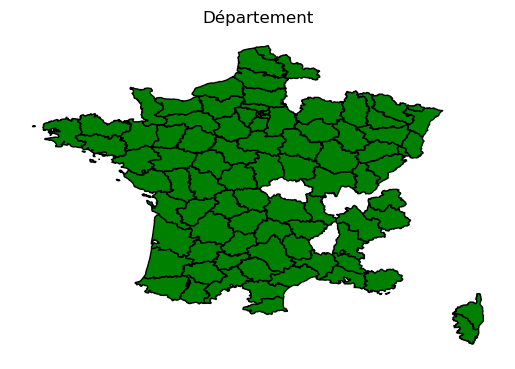

In [18]:
import geopandas as gpd
from shapely.geometry import shape
import matplotlib.pyplot as plt

# Conversion des données "geom" qui sont en GEOJSON en données "géometry" que Geopanda peut traiter
table_donnees['geometry'] = table_donnees['geom'].apply(lambda x: shape(x['geometry']))
gdf = gpd.GeoDataFrame(table_donnees, geometry='geometry')

# Créez une figure et des axes
fig, ax = plt.subplots()

# Affichez la carte à partir du GeoDataFrame
gdf.plot(ax=ax, color='green', edgecolor='black')

# Supprimez les axes
ax.set_axis_off()

# Supprimez les valeurs des axes x et y
ax.set_xticks([])
ax.set_yticks([])

# Ajoutez un titre à la carte
plt.title("Département")

# Affichez la carte
plt.show()

#Il manque les données d'un département: le Rhone 

In [19]:
import folium
import pandas as pd
m = folium.Map(location=[46.6031, 1.8883], zoom_start=6)
for index, row in table_donnees.iterrows():
    folium.GeoJson(row['geom'], name=row['nom_departement']).add_to(m)
m.save('carte.html')

## Comparaison par Secteur

## Analyse Géographique

# 6. Modélisation et Prédictions

## Choix des Modèles

## Entraînement et Test

# 7. Évaluation des Résultats

## Interprétation des Modèles

## Mesures de Performance 

# 8. Synthèse et Recommandations

## Conclusions Clés 

## Recommandations